In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [3]:
max_num_threads = 12
max_n = 2500
experiments = 3

data = np.full((max_num_threads,(max_n-100)//200 + 1,experiments),np.nan)

for experiment in range(experiments):
    for i in range(len(data)):
        a = np.genfromtxt(f'../data/{experiment+1}.{i+1}.txt')
        data[i,:,experiment] = a[:,1]
        
ns = a[:,0]
threads = np.arange(1,max_num_threads+1)

Text(0, 0.5, 'Threads')

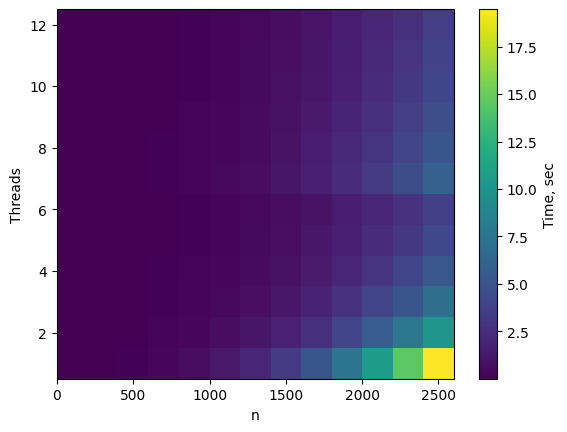

In [4]:
pcm = plt.pcolormesh(ns, threads, data.mean(axis=2))
plt.colorbar(pcm, label='Time, sec')
plt.xlabel('n')
plt.ylabel('Threads')

In [5]:
ns[5]

1100.0

In [6]:
for i in range(12):
    print(f'{data[i,5,2]:.2e}')

1.26e+00
6.59e-01
4.53e-01
3.43e-01
2.75e-01
2.38e-01
3.97e-01
3.54e-01
3.20e-01
2.93e-01
2.72e-01
2.57e-01


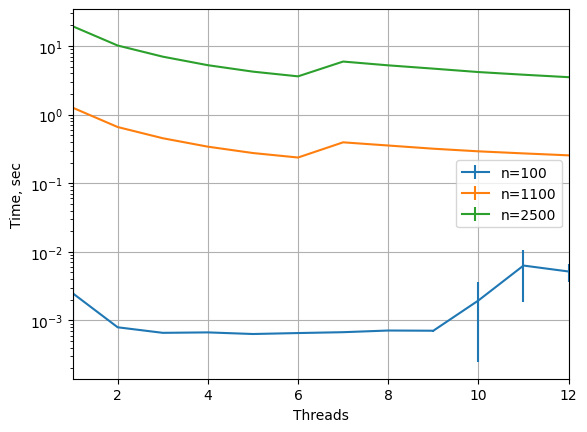

In [27]:
for i in [0, 5, -1]:
    plt.errorbar(threads, data.mean(axis=2)[:,i], yerr=data.std(axis=2)[:,i],
                 label=f'n={int(ns[i]):}')
plt.grid()
plt.legend()
plt.xlim(1,12)
plt.yscale('log')
plt.xlabel('Threads')
plt.ylabel('Time, sec')
plt.savefig('t_vs_threads.png', dpi=250, bbox_inches='tight')

In [44]:
speedup = np.full((max_num_threads,(max_n-100)//200+1),np.nan)
speedup_err = np.full((max_num_threads,(max_n-100)//200 + 1),np.nan)
for i in range(len(data)):
    speedup[i] = data[0].mean(axis=-1) / data[i].mean(axis=-1)
    speedup_err[i] = (data[0].std(axis=-1)*data[i].mean(axis=-1) \
                      + data[0].mean(axis=-1)*data[i].std(axis=-1)) / (data[i].mean(axis=-1))**2

Text(0, 0.5, 'Threads')

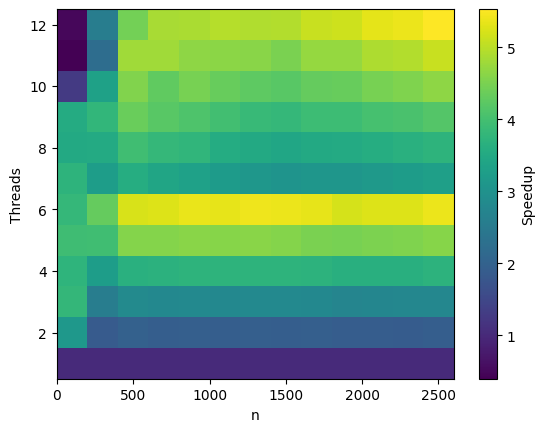

In [45]:
pcm = plt.pcolormesh(ns, threads, speedup)
plt.colorbar(pcm, label='Speedup')
plt.xlabel('n')
plt.ylabel('Threads')

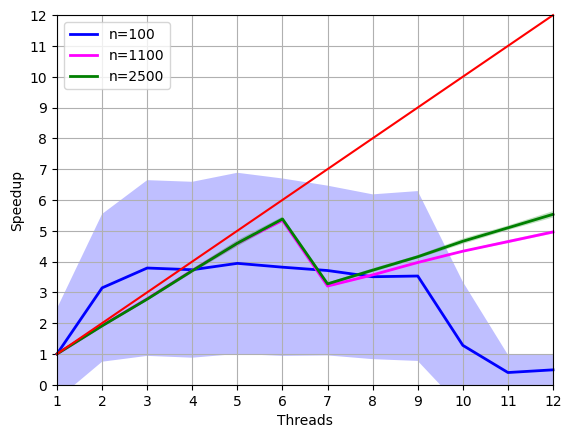

In [58]:
cs = ['blue', 'magenta', 'green']
j = 0
for i in [0,5,-1]:
    plt.plot(threads, speedup[:,i],
             linewidth=2, clip_on=False, 
             label=f'n={int(ns[i])}', color=cs[j])
    plt.fill_between(threads,
                     speedup[:,i]+speedup_err[:,i],
                     speedup[:,i]-speedup_err[:,i],
                     color=cs[j], edgecolor=None, alpha=0.25)
    j+=1
plt.plot(threads, threads, clip_on=False, color='red')
plt.xlim(1,12)
plt.ylim(0,12)
plt.xticks(np.arange(1,13))
plt.yticks(np.arange(13))
plt.grid()
plt.xlabel('Threads')
plt.ylabel('Speedup')
plt.legend()
plt.savefig('speedup_vs_threads.png', dpi=250, bbox_inches='tight')